In [58]:
!pip install kagglehub

In [3]:
import os
import kagglehub
import numpy as np
import pandas as pd
from datasets import DatasetDict, Dataset
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Download dataset
def load_dataset():
    dataset_path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")
    print("dataset downloaded to this path:", dataset_path)
    ds = pd.read_csv(os.path.join(dataset_path,'aa_dataset-tickets-multi-lang-5-2-50-version.csv'))
    ds = ds.rename(columns={'queue': 'label'})
    return ds

ds = load_dataset()

dataset downloaded to this path: /kaggle/input/multilingual-customer-support-tickets


In [7]:
# Count row
print("Record count:", len(ds['language']))
# Preview Data
ds.head()

Record count: 28587


,subject,body,answer,type,label,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [17]:
print("Number of unique data for each columns:")
print(ds.nunique())

Number of unique data for each columns:
subject     24749
body        28587
answer      28580
type            4
label          10
priority        3
language        2
version         3
tag_1         116
tag_2         256
tag_3         392
tag_4         554
tag_5         602
tag_6         575
tag_7         427
tag_8         224
dtype: int64


Count missing values for each column

subject      3838
body            0
answer          7
type            0
label           0
priority        0
language        0
version         0
tag_1           0
tag_2          13
tag_3         136
tag_4        3058
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64 

Count row based on languange column



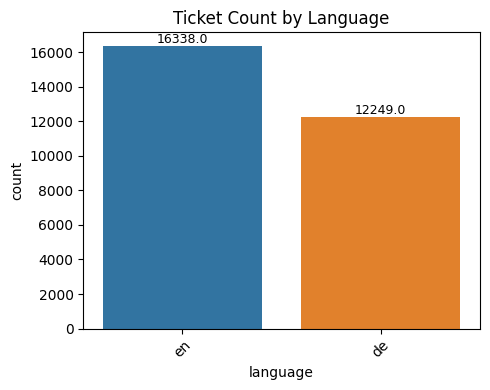

In [33]:
# Check missing values
print("Count missing values for each column\n")
print(ds.isnull().sum(),"\n")
# Count text based on language
print("Count row based on languange column\n")
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=ds, x='language', order=ds['language'].value_counts().index)
# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')
plt.title('Ticket Count by Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


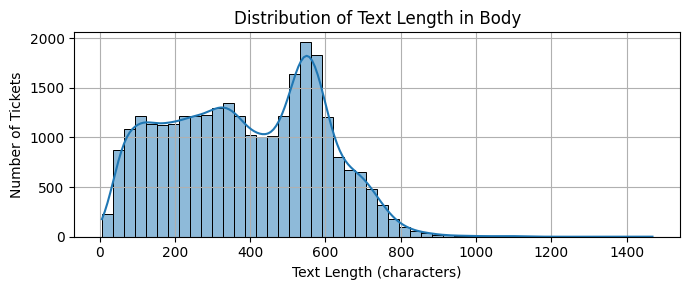

In [42]:
# new column for save text length
ds['body_length'] = ds['body'].astype(str).apply(len)
# text length distribution
plt.figure(figsize=(7, 3))
sns.histplot(ds['body_length'], bins=50, kde=True)
plt.title("Distribution of Text Length in Body")
plt.xlabel("Text Length (characters)")
plt.ylabel("Number of Tickets")
plt.grid(True)
plt.tight_layout()
plt.show()

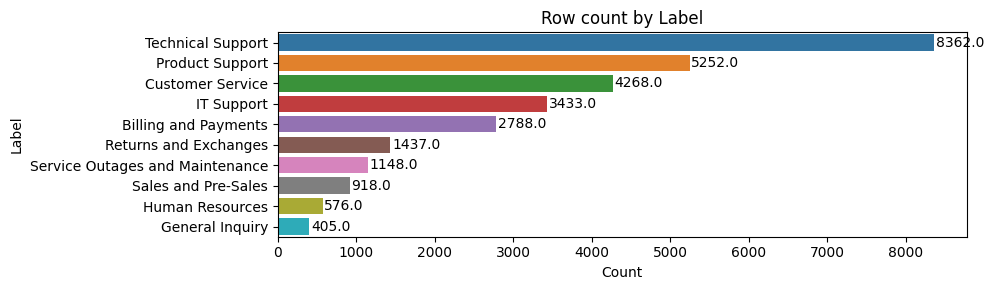

In [68]:
# Category frequency
plt.figure(figsize=(10, 3))
ax = sns.countplot(y='label', data=ds, order=ds['label'].value_counts().index)
plt.title("Row count by Label")
plt.xlabel("Count")
plt.ylabel("Label")
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width + 20, p.get_y() + p.get_height() / 2.),
                ha='left', va='center')
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import re

body_texts = ds['body'].astype(str)

count_html = 0
count_url = 0
count_email = 0
count_phone = 0
count_newlines = 0
count_whitespace = 0

# define function to count text contain each pattern
def count_matches(text):
    global count_html, count_url, count_email, count_phone, count_newlines, count_whitespace

    original = text
    text = text.lower()

    if re.search(r'<.*?>', text):
        count_html += 1
    if re.search(r"http\S+|www\S+", text):
        count_url += 1
    if re.search(r"\S+@\S+", text):
        count_email += 1
    if re.search(r"\b\d{10,}\b", text):
        count_phone += 1
    if '\\n' in original or '\\r' in original or '\n' in original:
        count_newlines += 1
    if re.search(r'\s{2,}', text):
        count_whitespace += 1

# apply to body column
body_texts.apply(count_matches)

# Display results
print("Text pattern match counts:")
print(f"HTML tags       : {count_html}")
print(f"URLs            : {count_url}")
print(f"Email addresses : {count_email}")
print(f"Phone numbers   : {count_phone}")
print(f"Newlines        : {count_newlines}")
print(f"Excess whitespace: {count_whitespace}")


Text pattern match counts:
HTML tags       : 1055
URLs            : 0
Email addresses : 0
Phone numbers   : 1
Newlines        : 1233
Excess whitespace: 3


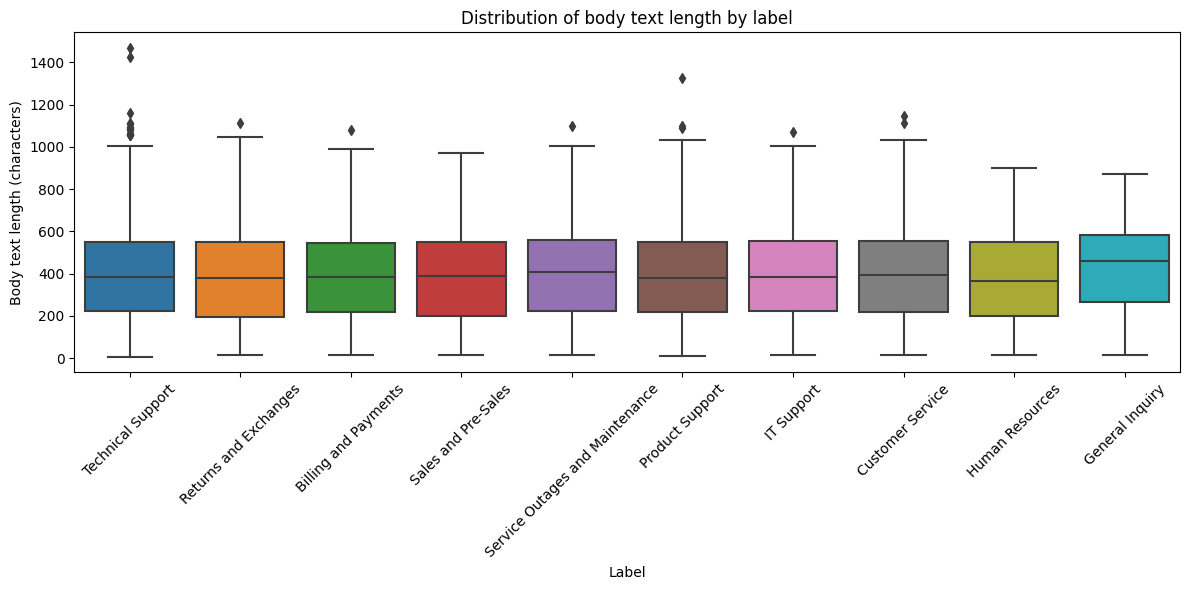

In [77]:
# Ensure body length is calculated
ds['body_length'] = ds['body'].astype(str).apply(len)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds, x='label', y='body_length')
plt.title("Distribution of body text length by label")
plt.xlabel("Label")
plt.ylabel("Body text length (characters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()